## Download Datasets from external sources

In [ ]:
%uv pip install dataset-tools roboflow

In [ ]:
%uv pip install setuptools

### Download from Dataset-Ninja (supervisely)

In [ ]:
import dataset_tools as dtools

dtools.download(dataset="dacl10k", dst_dir="./datasets/dataset-ninja/")

### Download from Roboflow Universe

In [ ]:
import os

from roboflow import Roboflow

rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")    
version = project.version(14)
dataset = version.download("coco")

# 🐍 Setup Focoos

In [ ]:
%pip install 'focoos @ git+https://github.com/FocoosAI/focoos.git'

In [ ]:
%uv pip install -e ..[cpu] 

# Focoos Cloud Dataset Management

This section covers the steps to see the datasets available on the FocoosAI platform and the creation of user datasets.


In [ ]:
import os

from focoos import Focoos

focoos = Focoos()

## Get the list of shared datasets

In [ ]:
import os

from focoos import Focoos

focoos = Focoos()
datasets = focoos.list_shared_datasets()

for dataset in datasets:
    print(f"Name: {dataset.name}")
    print(f"Reference: {dataset.ref}")
    print(f"Task: {dataset.task}")
    print(f"Description: {dataset.description}")
    print("-" * 50)

# User Dataset

In [ ]:
import os

from focoos import Focoos

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"))

datasets = focoos.list_datasets(include_shared=False)
for dataset in datasets:
    print(f"Name: {dataset.name}")
    print(f"Reference: {dataset.ref}")
    print(f"Task: {dataset.task}")
    print(f"Description: {dataset.description}")
    print(f"spec: {dataset.spec}")
    print("-" * 50)

### Delete datasets

In [ ]:
import os

from focoos import Focoos

focoos = Focoos(api_key=os.getenv("FOCOOS_API_KEY"))

datasets = focoos.list_datasets(include_shared=False)
refs = [ds.ref for ds in datasets]
for ref in refs:
    ds = focoos.get_remote_dataset(ref)
    ds.delete_remote_data()
    ds.delete()

In [ ]:
focoos.get_user_info()

## Create and upload a dataset

In [ ]:
from focoos import DatasetLayout, Focoos, FocoosTask

focoos = Focoos()

ds = focoos.add_remote_dataset(
    name="aeroscapes", description="AeroScapes", layout=DatasetLayout.SUPERVISELY, task=FocoosTask.SEMSEG
)
ds_spec = ds.upload_data("./datasets/dataset-ninja/aeroscapes1.zip")

In [ ]:
from focoos import DatasetLayout, Focoos, FocoosTask

focoos = Focoos()

ds = focoos.add_remote_dataset(
    name="ballons", description="Ballons", layout=DatasetLayout.ROBOFLOW_SEG, task=FocoosTask.SEMSEG
)
ds_spec = ds.upload_data("./.data/balloons-roboflow-sem.zip")

## Download dataset

In [ ]:
import os

from focoos import Focoos

focoos = Focoos()
_datasets = focoos.list_datasets(include_shared=False)
ds = focoos.get_remote_dataset(_datasets[0].ref)
dataset_path = ds.download_data()

In [ ]:
from focoos.data.datasets.dict_dataset import DictDataset
from focoos.data.datasets.map_dataset import MapDataset
from focoos.data.mappers.classification_dataset_mapper import ClassificationDatasetMapper
from focoos.ports import DatasetSplitType

train_dataset = DictDataset.from_folder("../datasets/hymenoptera_data", split=DatasetSplitType.TRAIN)

val_dataset = DictDataset.from_folder("../datasets/hymenoptera_data", split=DatasetSplitType.VAL)

print(f"Loaded training dataset with {len(train_dataset)} images")
print(f"Loaded validation dataset with {len(val_dataset)} images")
print(f"Classes: {train_dataset.metadata.thing_classes}")

# Create the dataset mappers with augmentations
train_mapper = ClassificationDatasetMapper(
    is_train=True,
    augmentations=[],
)

val_mapper = ClassificationDatasetMapper(
    is_train=False,
    augmentations=[],
)

train_map = MapDataset(mapper=train_mapper, dataset=train_dataset)
val_map = MapDataset(mapper=val_mapper, dataset=val_dataset)

In [ ]:
import random

from PIL import Image

idx = random.randint(0, len(train_map))
display(Image.fromarray(train_map[idx].image.numpy().transpose(1, 2, 0)))
print(train_map[idx].label)

# visualize targets

In [11]:
import torch
import os

PATH = "/home/ubuntu/focoos-1/notebooks/debug_outputs"
PATH_IMAGES = os.path.join(PATH, "images.pt")
PATH_TARGETS = os.path.join(PATH, "target_masks.pt")
CLASSES = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

images = torch.load(PATH_IMAGES).cpu().float()
targets = torch.load(PATH_TARGETS).cpu().float()

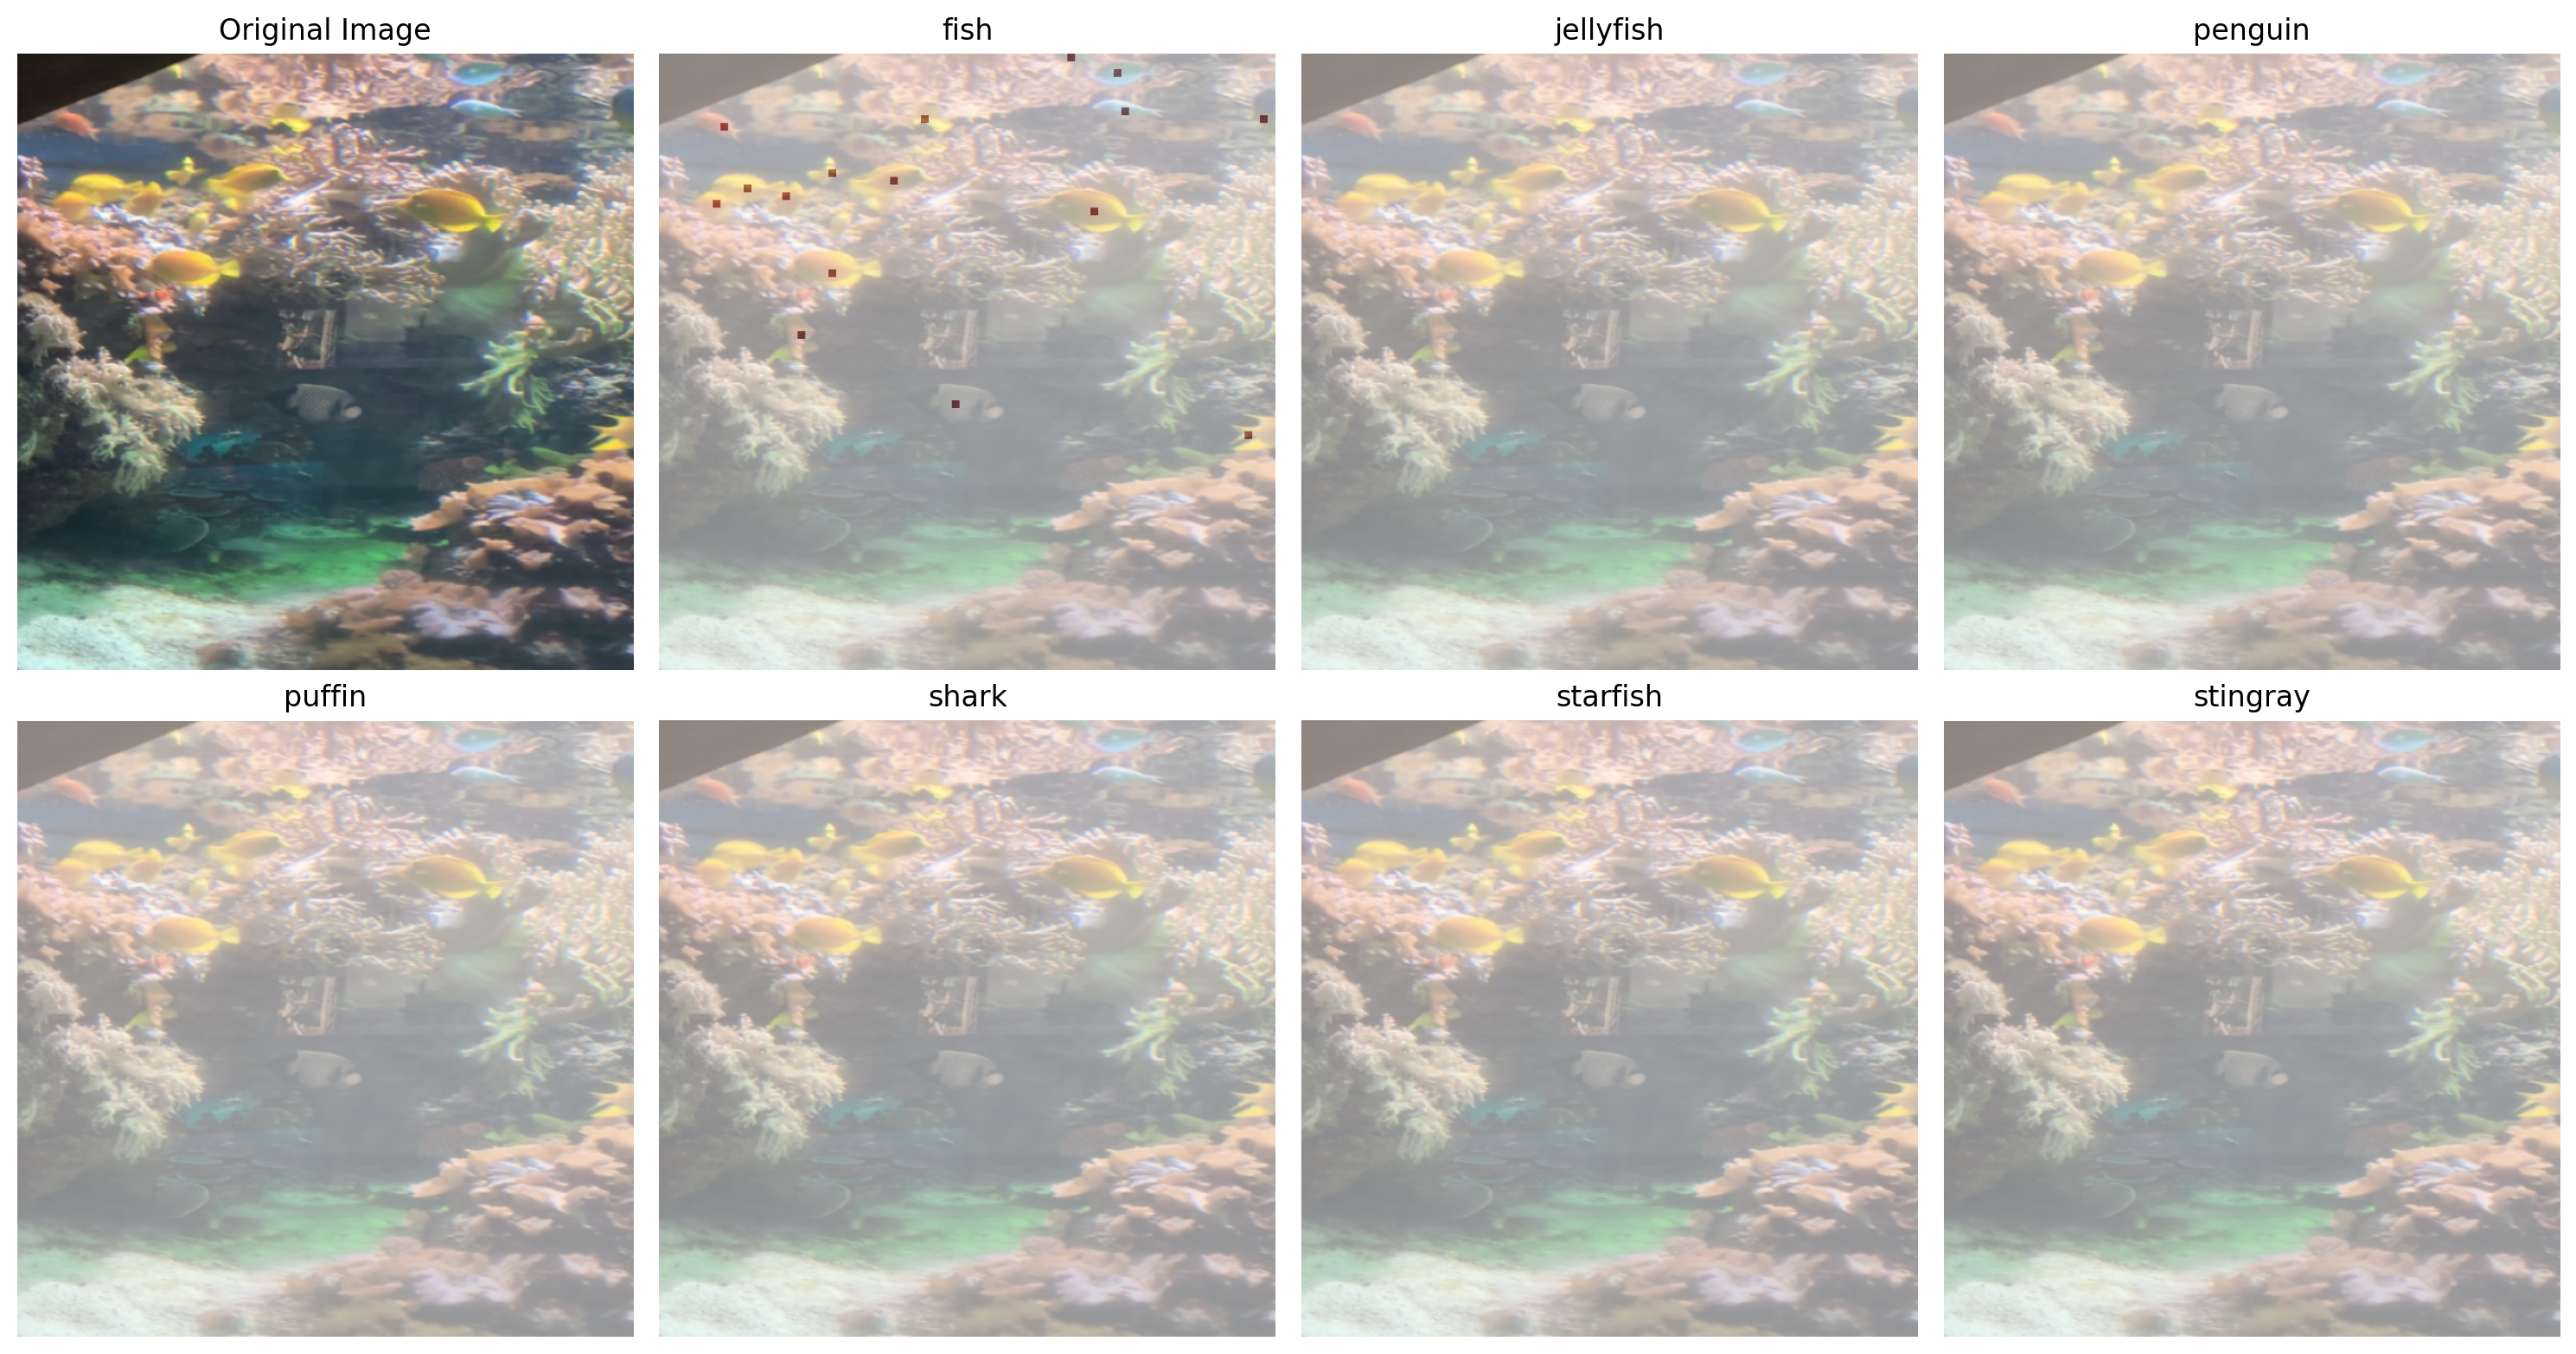

In [26]:
import matplotlib.pyplot as plt
import numpy as np

INDEX = 0

img = images[INDEX].numpy().transpose(1,2,0)
target_masks = targets[INDEX]  # Shape: (num_classes, h, w)

# Get image dimensions
img_h, img_w = img.shape[:2]
mask_h, mask_w = target_masks.shape[1:]

# Create figure with subplots for each class
fig, axes = plt.subplots(2, 4, figsize=(15, 8), dpi=200)
axes = axes.flatten()

# Plot original image
axes[0].imshow(img.astype(np.uint8))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot each class mask overlaid on image
for i in range(len(CLASSES)):
    mask = target_masks[i]
    # Resize mask to match image dimensions
    mask = torch.nn.functional.interpolate(
        mask.unsqueeze(0).unsqueeze(0), 
        size=(img_h, img_w), 
        mode='nearest'
    )[0,0].numpy()
    
    # Create overlay
    axes[i+1].imshow(img.astype(np.uint8))
    axes[i+1].imshow(mask, alpha=0.5, cmap='Reds')
    axes[i+1].set_title(CLASSES[i])
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()
